<a href="https://colab.research.google.com/github/piupiu001/Sentiment-Analysis/blob/main/Sentiment_Analyst_Hotel_Naive_Baiyes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from time import time
import seaborn as sns

!pip install dataprep
from dataprep.eda import plot

import nltk
import string
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk import PorterStemmer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 1.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 300.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252705 sha256=40940b3ee4cbfa81

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Import Library
import pandas as pd
import numpy as np
from scipy import stats
from scipy import mean
from scipy import median
import statistics
df = pd.read_excel('/content/gdrive/MyDrive/ColabNotebooks/MBKM/HOTEL x YOGYAKARTA.xlsx')
df.head(2)

,ui_header_link,crvsd,tehyy,Field18,default,phmbo,phmbo1,qwuub,Title,nnocn,miihc,minam
0,Orinov,Orinov Jun 2023,June 2023,1.0,"Jakarta, Indonesia",12,1.0,Bad experience,4 stars hotel but feels like not a 4 stars hot...,NaN,NaN,NaN
1,Panggalih R,Panggalih R Oct 2022,October 2022,NaN,NaN,4,NaN,Terrible for 4 stars hotel,"Second stay, Cek in room 103, room humid, ac t...",NaN,NaN,NaN


# Data Cleaning

---
**Drop Coloumn**

Menghapus kolom data yang dirasa tidak berpengaruh banyak pada analisis.


In [ ]:
# Drop kolom variabel yang tidak diperlukan
df.drop(['ui_header_link'], axis = 1, inplace = True)
df.drop(['tehyy'], axis = 1, inplace = True)
df.drop(['default'], axis = 1, inplace = True)
df.drop(['nnocn'], axis = 1, inplace = True)
df.drop(['crvsd'], axis = 1, inplace = True)
df.drop(['miihc'], axis = 1, inplace = True)
df.drop(['minam'], axis = 1, inplace = True)
df.drop(['phmbo'], axis = 1, inplace = True)
df.drop(['phmbo1'], axis = 1, inplace = True)
df.drop(['qwuub'], axis = 1, inplace = True)

---
 **Rename**

 Mengganti nama kolom agar lebih sesuai dengan isi datanya.

In [ ]:
# Rename nama kolom
df= df.rename(columns={'Field18':'rating'})
df= df.rename(columns={'phmbo':'kontribusi'})
df= df.rename(columns={'phmbo1':'helpful_vote'})
df= df.rename(columns={'qwuub':'header_komen'})
df= df.rename(columns={'Title':'komen'})


---
**Missing Value**

Mengecek apakah ada *missing value* pada data.

In [ ]:
df.isna().sum()

rating    21
komen      0
dtype: int64

In [ ]:
df['rating'] = df['rating'].fillna(0)

df.isna().sum()

rating    0
komen     0
dtype: int64

---
**Ukuran data**

Melihat banyak data (baris dan kolom).

In [ ]:
df.shape

(118, 2)

---
**Duplicate**

Mengecek apakah ada duplikasi data.

In [ ]:
df[df.duplicated()]

,rating,komen


Tidak ada duplikasi data

<Axes: >

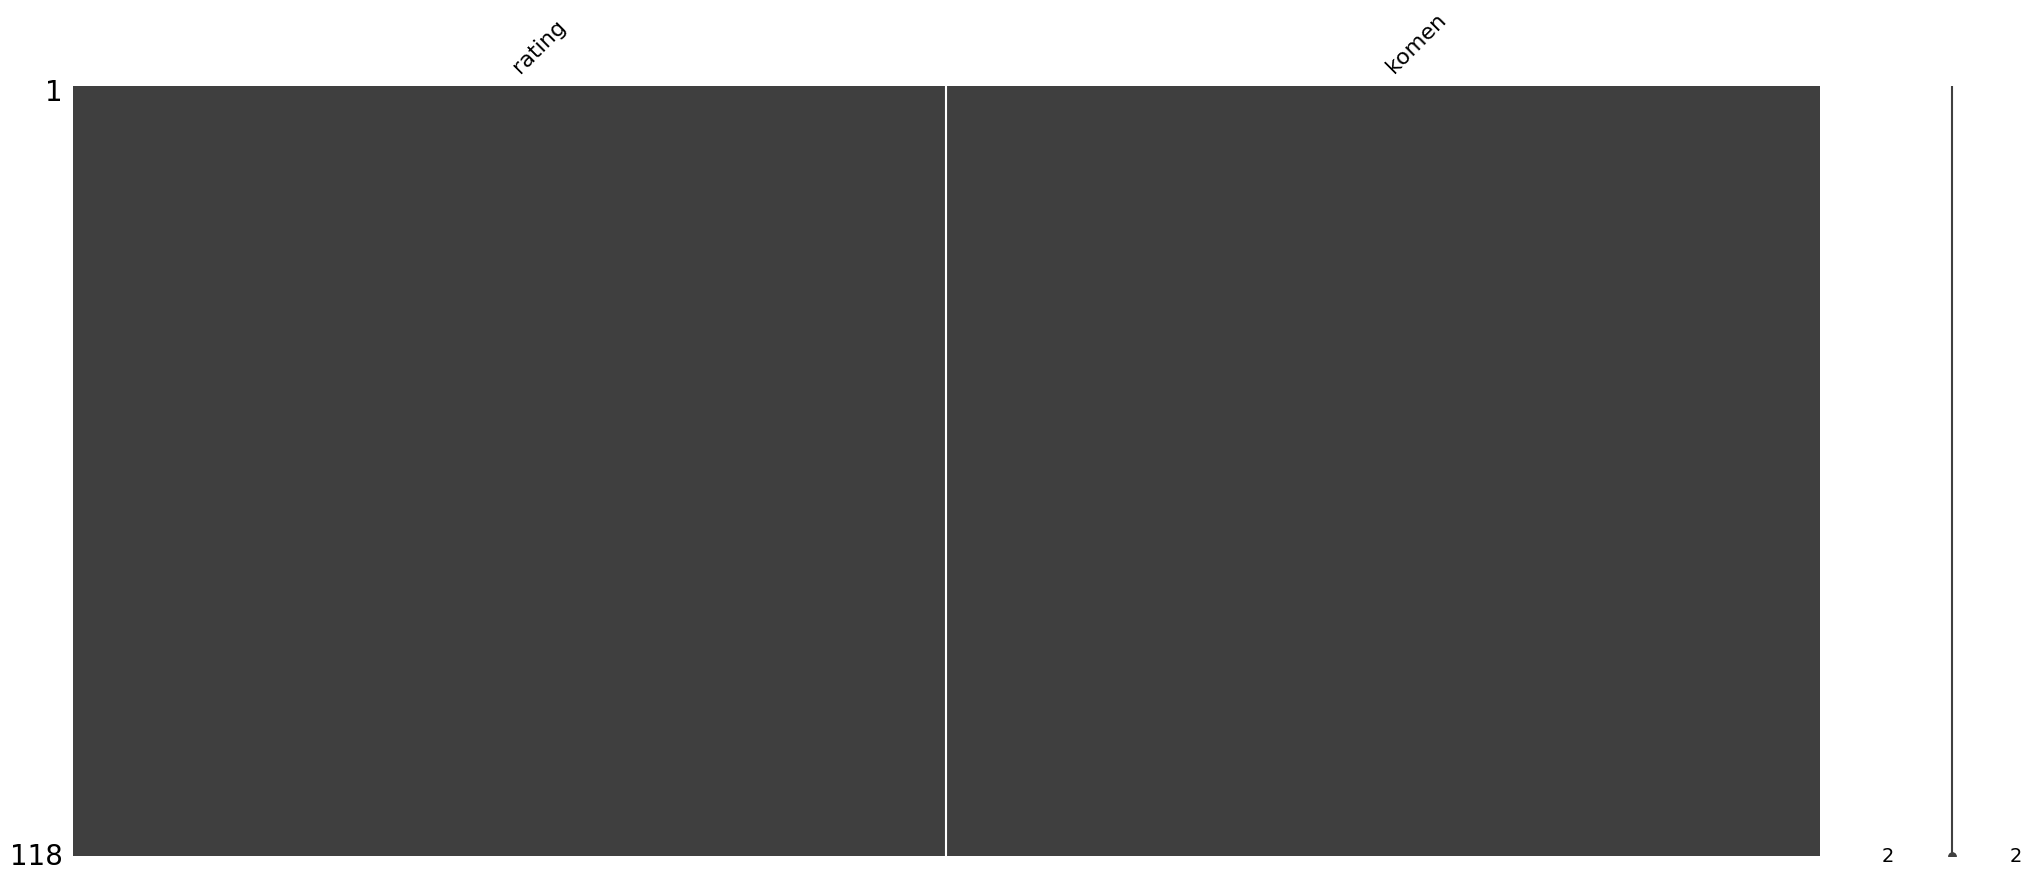

In [ ]:
import missingno as msno

msno.matrix(df)

---
**Sortir data yang akan digunakan**

Menampilkan komen dengan urutan banyak kata pada kolom komen.

In [ ]:
# Menghitung banyak kata pada kolom komen.
df['word_count'] = df['komen'].apply(lambda x: len(str(x).split(" ")))
# MEnghitung banyak char pada kolom komen.
df['char_count'] = df['komen'].str.len()

In [ ]:
#menampilkan komeng memiliki banyak upvote
most_upvoted = df.iloc[0]
print(df)

     rating                                              komen  word_count  \
0       1.0  4 stars hotel but feels like not a 4 stars hot...          88   
1       0.0  Second stay, Cek in room 103, room humid, ac t...          54   
2       1.0  THIEF!!!  The valet parking staff swapped the ...         119   
3       5.0  The room has great design and cozy. Breakfast ...          33   
4       5.0  The hotel is rebuilt next to Lippo Mall. The r...          41   
..      ...                                                ...         ...   
113     5.0  Stayed here before back in 2007 which was not ...         151   
114     5.0  I enjoyed staying at Saphir Hotel because it w...          68   
115     2.0  The reviews here, they're not entirely false. ...         129   
116     2.0  I chose this hotel because I read a reasonably...         156   
117     2.0  Stayed here last August. The good thing about ...          91   

     char_count  
0           471  
1           283  
2        

# Data Pre-processing

---
**Cleanning Text**

Membersihkan text dari simbol,angka, link, enter menjadi spasi, dll.

In [ ]:
def cleaningText(text):
    text = re.sub("[^a-zA-Z]", " ",str(text))
    text = re.sub(r'@[A-Za-z0-9]+', '', text)   # hapus mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text)   # hapus hashtag
    text = re.sub(r'RT[\s]', '', text)          # hapus RT
    text = re.sub(r"http\S+", '', text)         # hapus link
    text = re.sub(r'[0-9]+', '', text)          # hapus numbers

    text = text.replace('\n', ' ')              # mengubah new line menjadi spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # hapus punctuations
    text = text.strip(' ')                      # hapus characters space from both left and right text
    return text

---
**Case Folding**

Membuat text menjadi huruf kecil.

In [ ]:
def casefoldingText(text):
    text = text.lower()
    return text

---
**Tokenizing**

Tokenizing merupakan tahap melakukan pemecahan kata menjadi sebuah list data.

In [ ]:
# Tokenizing (splitting sentences into a list of tokens)
def tokenizingText(text):
    text = sent_tokenize(text)
    return text

---
**Stopword**

Stopword merupakan tahap dimana dilakukan tahap penghapusan kata yang tidak memiliki makna dalam teks.

In [ ]:
# Hapus stopwords (kata yang tidak memiliki makna) in a text
def filteringText(text):
    listStopwords = set(stopwords.words('english'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

---
**Stemming**

Mengubah menjadi kata dasar.

In [ ]:
# Reducing a word to its word stem (kata baku) that affixes to suffixes and prefixes or to the roots of words
def stemmingText(text):
    factory = PorterStemmer()
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text]
    return text

---
**Menerapkan seluruh perintah Pre-processing data pada kolom komentar**

In [ ]:
#Pre-processing untuk kolom 'komen'
df['text_preprocessed'] = df['komen']
df['text_preprocessed'] = df['text_preprocessed'].apply(cleaningText)
df['text_preprocessed'] = df['text_preprocessed'].apply(casefoldingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(tokenizingText)
df['text_preprocessed'] = df['text_preprocessed'].apply(filteringText)
df['text_preprocessed'] = df['text_preprocessed'].apply(stemmingText)

# drop duplicates/spams comment
df.drop_duplicates(subset = 'komen', inplace = True)
df.head(3)

,rating,komen,word_count,char_count,text_preprocessed
0,1.0,4 stars hotel but feels like not a 4 stars hot...,88,471,[stars hotel but feels like not a stars hote...
1,0.0,"Second stay, Cek in room 103, room humid, ac t...",54,283,[second stay cek in room room humid ac ...
2,1.0,THIEF!!! The valet parking staff swapped the ...,119,594,[thief the valet parking staff swapped the...


In [ ]:
df.shape

(118, 5)

# Export Data

Export data yang sudah bersih dan telah melakukan tahap pre-processing.

In [ ]:
# Export to CSV baru
df.to_csv('/content/gdrive/MyDrive/ColabNotebooks/MBKM/Jurnal/data_clean_hotel.csv', index=False)

# Modeling : Multinominal Naive Bayes



## Read data clean

In [ ]:
# Read data clean
df_clean = pd.read_csv('/content/gdrive/MyDrive/ColabNotebooks/MBKM/Jurnal/data_clean_hotel.csv')
df.head(3)

,rating,komen,word_count,char_count,text_preprocessed
0,1.0,4 stars hotel but feels like not a 4 stars hot...,88,471,[stars hotel but feels like not a stars hote...
1,0.0,"Second stay, Cek in room 103, room humid, ac t...",54,283,[second stay cek in room room humid ac ...
2,1.0,THIEF!!! The valet parking staff swapped the ...,119,594,[thief the valet parking staff swapped the...


## Data preparation


---
**Labeling**

Menggunakan vender sentimen Vender_Lexicon dr github

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
darth = SentimentIntensityAnalyzer()

In [ ]:
darth.polarity_scores(df_clean.iloc[0]['text_preprocessed'])

{'neg': 0.051, 'neu': 0.64, 'pos': 0.308, 'compound': 0.9804}

In [ ]:
df_clean['polarity'] = df_clean['text_preprocessed'].apply(lambda review:darth.polarity_scores(str(review)))

df_clean.head(3)

,rating,komen,word_count,char_count,text_preprocessed,polarity
0,1.0,4 stars hotel but feels like not a 4 stars hot...,88,471,['stars hotel but feels like not a stars hot...,"{'neg': 0.051, 'neu': 0.64, 'pos': 0.308, 'com..."
1,0.0,"Second stay, Cek in room 103, room humid, ac t...",54,283,['second stay cek in room room humid ac...,"{'neg': 0.197, 'neu': 0.745, 'pos': 0.058, 'co..."
2,1.0,THIEF!!! The valet parking staff swapped the ...,119,594,['thief the valet parking staff swapped th...,"{'neg': 0.05, 'neu': 0.924, 'pos': 0.025, 'com..."


In [ ]:
df_clean['compound'] = df_clean['polarity'].apply(lambda d:d['compound'])
df_clean.head()

,rating,komen,word_count,char_count,text_preprocessed,polarity,compound
0,1.0,4 stars hotel but feels like not a 4 stars hot...,88,471,['stars hotel but feels like not a stars hot...,"{'neg': 0.051, 'neu': 0.64, 'pos': 0.308, 'com...",0.9804
1,0.0,"Second stay, Cek in room 103, room humid, ac t...",54,283,['second stay cek in room room humid ac...,"{'neg': 0.197, 'neu': 0.745, 'pos': 0.058, 'co...",-0.8681
2,1.0,THIEF!!! The valet parking staff swapped the ...,119,594,['thief the valet parking staff swapped th...,"{'neg': 0.05, 'neu': 0.924, 'pos': 0.025, 'com...",-0.4019
3,5.0,The room has great design and cozy. Breakfast ...,33,207,['the room has great design and cozy breakfas...,"{'neg': 0.0, 'neu': 0.714, 'pos': 0.286, 'comp...",0.9186
4,5.0,The hotel is rebuilt next to Lippo Mall. The r...,41,219,['the hotel is rebuilt next to lippo mall the...,"{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'comp...",0.9539


In [ ]:
# Pemberian Label
df_clean['polarity'] = df_clean['compound'].apply(lambda score: 'Positive' if score >=0 else 'Negative')

In [ ]:
df_clean

,rating,komen,word_count,char_count,text_preprocessed,polarity,compound
0,1.0,4 stars hotel but feels like not a 4 stars hot...,88,471,['stars hotel but feels like not a stars hot...,Positive,0.9804
1,0.0,"Second stay, Cek in room 103, room humid, ac t...",54,283,['second stay cek in room room humid ac...,Negative,-0.8681
2,1.0,THIEF!!! The valet parking staff swapped the ...,119,594,['thief the valet parking staff swapped th...,Negative,-0.4019
3,5.0,The room has great design and cozy. Breakfast ...,33,207,['the room has great design and cozy breakfas...,Positive,0.9186
4,5.0,The hotel is rebuilt next to Lippo Mall. The r...,41,219,['the hotel is rebuilt next to lippo mall the...,Positive,0.9539
...,...,...,...,...,...,...,...
113,5.0,Stayed here before back in 2007 which was not ...,151,786,['stayed here before back in which was no...,Positive,0.9715
114,5.0,I enjoyed staying at Saphir Hotel because it w...,68,344,['i enjoyed staying at saphir hotel because it...,Positive,0.9538
115,2.0,"The reviews here, they're not entirely false. ...",129,695,['the reviews here they re not entirely false...,Positive,0.5423
116,2.0,I chose this hotel because I read a reasonably...,156,786,['i chose this hotel because i read a reasonab...,Positive,0.7787


## Chart Grafik

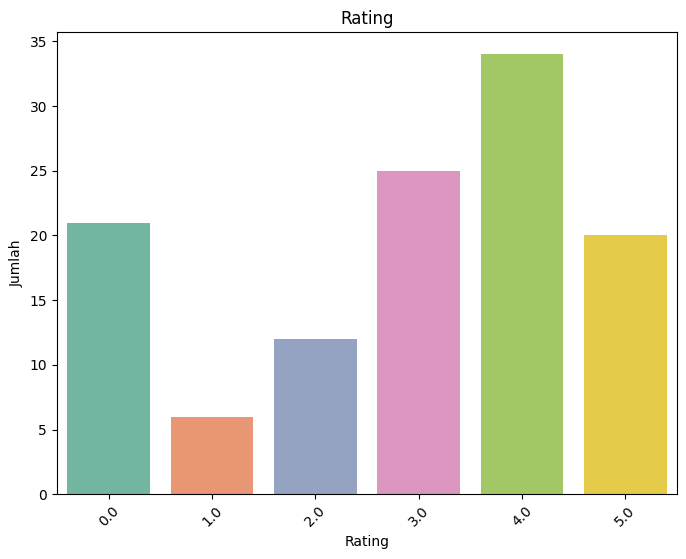

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='rating', palette='Set2')

plt.title("Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")

plt.xticks(rotation=45)
plt.show()

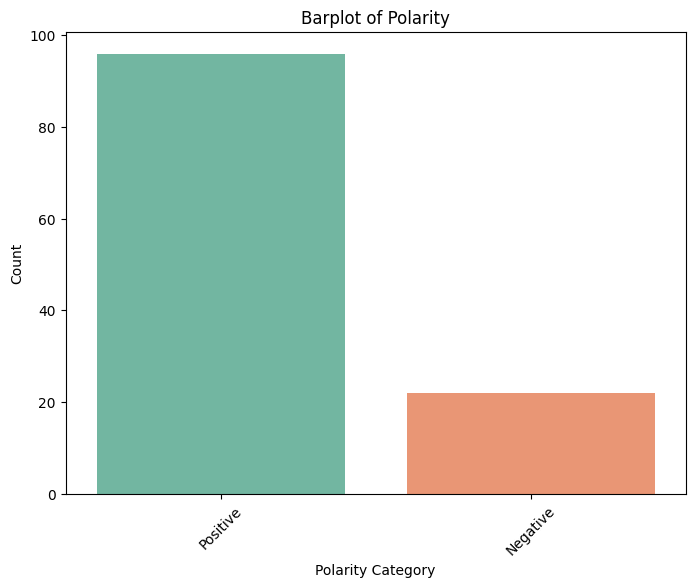

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='polarity', palette='Set2')

plt.title("Barplot of Polarity")
plt.xlabel("Polarity Category")
plt.ylabel("Count")

plt.xticks(rotation=45)
plt.show()

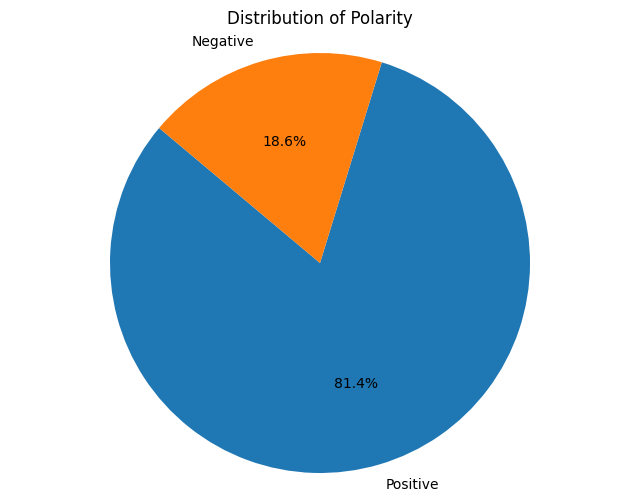

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(df_clean['polarity'].value_counts(), labels=df_clean['polarity'].value_counts().index, autopct='%1.1f%%', startangle=140)

plt.title("Distribution of Polarity")

plt.axis('equal')
plt.show()

In [ ]:
# Melihat data_clean yang memiliki value 0 pada kolom compound
neutral_row = df_clean[df_clean['compound'] == 0]
print(neutral_row)

    rating                                              komen  word_count  \
25     4.0  Nice Clean room. The minus : all foods in the ...          41   
74     4.0  It is about fifteen minutes from Yogyakarta ai...          36   

    char_count                                  text_preprocessed  polarity  \
25         200  ['nice clean room  the minus   all foods in th...  Positive   
74         228  ['it is about fifteen minutes from yogyakarta ...  Positive   

    compound  
25       0.0  
74       0.0  


## Visualizing Word Clouds

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
df_negatif = df_clean[df_clean['polarity']=='Negative']
df_positif = df_clean[df_clean['polarity']=='Positive']
df_neutral= df_clean[df_clean['polarity']=='Neutral']

In [ ]:
df_negatif = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df_negatif))
df_positif = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df_positif))
df_neutral = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str(df_neutral))

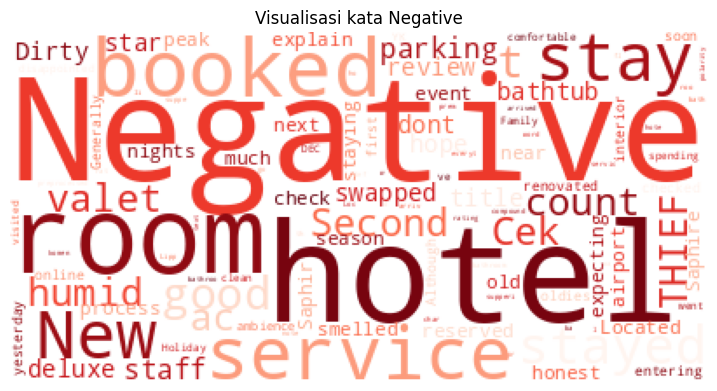

In [ ]:
worcloud=WordCloud(max_font_size=160, margin=0, background_color='white', colormap='Reds').generate(df_negatif)
plt.figure(figsize=(9,5))
plt.imshow(worcloud)
plt.axis('off')
plt.title('Visualisasi kata Negative')
plt.margins(x=0,y=0)
plt.show()

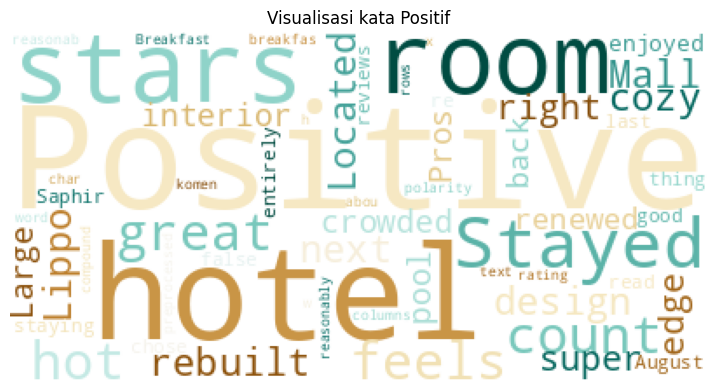

In [ ]:
worcloud=WordCloud(max_font_size=160, margin=0, background_color='white', colormap='BrBG').generate(df_positif)
plt.figure(figsize=(9,5))
plt.imshow(worcloud)
plt.axis('off')
plt.title('Visualisasi kata Positif')
plt.margins(x=0,y=0)
plt.show()

## Export Data Label

In [ ]:
df_clean.to_csv('/content/gdrive/MyDrive/ColabNotebooks/MBKM/Jurnal/data_labelling.csv', index=False)

## TF IDF
feature extraxtion menggunakan TF IDF

menentukan nilai frekuensi sebuah kata di dalam sebuah dokumen

In [ ]:
tfidf = TfidfVectorizer(lowercase=True)

text_tf = tfidf.fit_transform(df_clean['text_preprocessed'].dropna().values.astype('U'))
text_tf

<118x1658 sparse matrix of type '<class 'numpy.float64'>'
	with 6580 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_tf, X_test_tf, y_train, y_test = train_test_split(df_clean['text_preprocessed'], df_clean['polarity'], test_size = 0.2, random_state = 42)

### Modeling Naive Bayes


In [ ]:
def accuracy_summary(pipeline, X_train_tf, y_train, X_test_tf, y_test):
    sentiment_fit = pipeline.fit(X_train_tf, y_train)
    y_pred = sentiment_fit.predict(X_test_tf)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [ ]:
cv = CountVectorizer()
nb = MultinomialNB()
# Rentang nomor fitur yang akan dievaluasi (default: 1000 hingga 50001, bertambah 10000)
n_features = np.arange(1000,50001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train_tf, y_train, X_test_tf, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

MultinomialNB()


Test result for 1000 features
accuracy score: 91.67%
Test result for 11000 features
accuracy score: 91.67%
Test result for 21000 features
accuracy score: 91.67%
Test result for 31000 features
accuracy score: 91.67%
Test result for 41000 features
accuracy score: 91.67%


In [ ]:
cv = CountVectorizer(max_features=1000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train_tf, y_train)
y_pred = sentiment_fit.predict(X_test_tf)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("accuracy score")
print(accuracy_score(y_test, y_pred))


              precision    recall  f1-score   support

    Negative       0.50      0.50      0.50         2
    Positive       0.95      0.95      0.95        22

    accuracy                           0.92        24
   macro avg       0.73      0.73      0.73        24
weighted avg       0.92      0.92      0.92        24

accuracy score
0.9166666666666666


Algoritma Naive Bayes mendapatkan akurasi sebesar 0.92 = 92%

In [ ]:
# Menampilkan confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 1  1]
 [ 1 21]]


## Label Encoder

In [ ]:
label_encoder = TfidfVectorizer()

text_tf = label_encoder.fit_transform(df_clean['text_preprocessed'].dropna().values.astype('U'))
text_tf

<118x1658 sparse matrix of type '<class 'numpy.float64'>'
	with 6580 stored elements in Compressed Sparse Row format>

In [ ]:
X_train_le, X_test_le, y_train, y_test = train_test_split(df_clean['text_preprocessed'], df_clean['polarity'], test_size = 0.2, random_state = 42)

### Modeling Naive Bayes

In [ ]:
def accuracy_summary(pipeline, X_train_le, y_train, X_test_le, y_test):
    sentiment_fit = pipeline.fit(X_train_le, y_train)
    y_pred = sentiment_fit.predict(X_test_le)
    accuracy = accuracy_score(y_test, y_pred)
    print("accuracy score: {0:.2f}%".format(accuracy*100))
    return accuracy

In [ ]:
cv = CountVectorizer()
nb = MultinomialNB()
n_features = np.arange(10000,30001,10000)
def nfeature_accuracy_checker(vectorizer=cv, n_features=n_features, stop_words=None, ngram_range=(1, 1), classifier=nb):
    result = []
    print(classifier)
    print("\n")
    for n in n_features:
        vectorizer.set_params(stop_words=stop_words, max_features=n, ngram_range=ngram_range)
        checker_pipeline = Pipeline([
            ('vectorizer', vectorizer),
            ('classifier', classifier)
        ])
        print("Test result for {} features".format(n))
        nfeature_accuracy = accuracy_summary(checker_pipeline, X_train_le, y_train, X_test_le, y_test)
        result.append((n,nfeature_accuracy))
    return result
tfidf = TfidfVectorizer()
print("Result for trigram with stop words (Tfidf)\n")
feature_result_tgt = nfeature_accuracy_checker(vectorizer=tfidf,ngram_range=(1, 3))

Result for trigram with stop words (Tfidf)

MultinomialNB()


Test result for 10000 features
accuracy score: 91.67%
Test result for 20000 features
accuracy score: 91.67%
Test result for 30000 features
accuracy score: 91.67%


In [ ]:
cv = CountVectorizer(max_features=10000,ngram_range=(1, 3))
pipeline = Pipeline([
        ('vectorizer', cv),
        ('classifier', nb)
    ])
sentiment_fit = pipeline.fit(X_train_le, y_train)
y_pred = sentiment_fit.predict(X_test_le)
print(classification_report(y_test, y_pred, target_names=['Negative','Positive']))
print("accuracy score :")
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         2
    Positive       0.92      1.00      0.96        22

    accuracy                           0.92        24
   macro avg       0.46      0.50      0.48        24
weighted avg       0.84      0.92      0.88        24

accuracy score :
0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Pada algoritma Naive Bayes didapatkan akurasi sebesar 0.92 = 92%

In [ ]:
# Menampilkan confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 0  2]
 [ 0 22]]


# referensi you tube:

*   [Langsung Paham!!! Berikut Cara Mudah Membuat Sentiment Analysis dengan Python
](https://www.youtube.com/watch?v=iEOJtTEmCN8)
*   [Analisis Sentimen (Naive Bayes) Untuk Ulasan Mobil Listrik di Indonesia | Belajar Machine Learning](https://www.youtube.com/watch?v=ztV7_--D2GM)